In [8]:
# Breast Cancer Prediction Using Feed-Forward Neural Network (ANN)

# This notebook demonstrates a feed-forward neural network to predict whether a tumor is benign or malignant using the `sklearn.datasets.load_breast_cancer`.

# We will cover:
#   - Dataset inspection
#   - Data preprocessing
#   - ANN building
#   - Model evaluation (accuracy, precision, recall, F1-score, ROC-AUC)
#   - Visualization: confusion matrix, ROC curve, Precision-Recall curve
#   - Model saving & loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

import joblib

In [9]:
# Load dataset
data = load_breast_cancer(as_frame=True)
data = data.frame  # Already a DataFrame with features + target

In [10]:
# Show first 5 rows
print(data.head())
print(data.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [11]:
# Features
X = data.drop("target", axis=1)
# Target (already numeric: 0 = malignant, 1 = benign)
y = data["target"]

In [12]:
# Inspect shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Build the ANN model
# Create ANN model
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation="tanh"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

c:\Users\user\Desktop\case_3-predicting_breast_cancer\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [17]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7940 - loss: 0.5534 - val_accuracy: 0.9231 - val_loss: 0.4392
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9148 - loss: 0.3932 - val_accuracy: 0.9560 - val_loss: 0.3347
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9313 - loss: 0.3040 - val_accuracy: 0.9670 - val_loss: 0.2719
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.2449 - val_accuracy: 0.9780 - val_loss: 0.2279
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9670 - loss: 0.2011 - val_accuracy: 0.9780 - val_loss: 0.1954
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.1663 - val_accuracy: 0.9780 - val_loss: 0.1717
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.1392 - val_accuracy: 0.9780 - val_loss: 0.1537
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9835 - loss: 0.1200 - val_accuracy: 0.9780 - 

In [19]:
# Predict probabilities and class labels
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [20]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
AUC-ROC: 0.9957418932197839


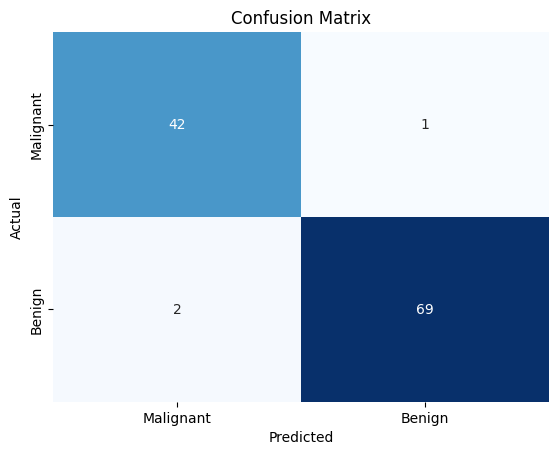

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

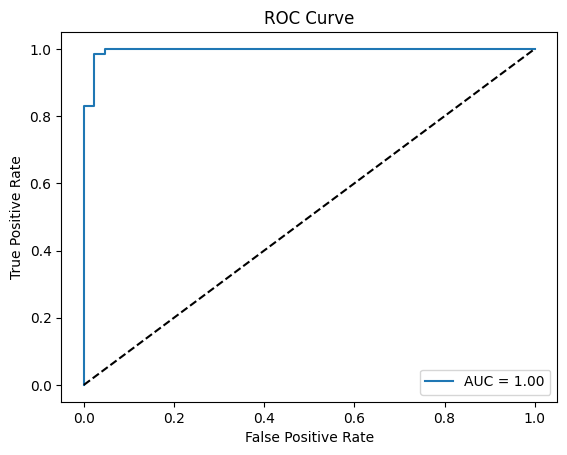

In [24]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

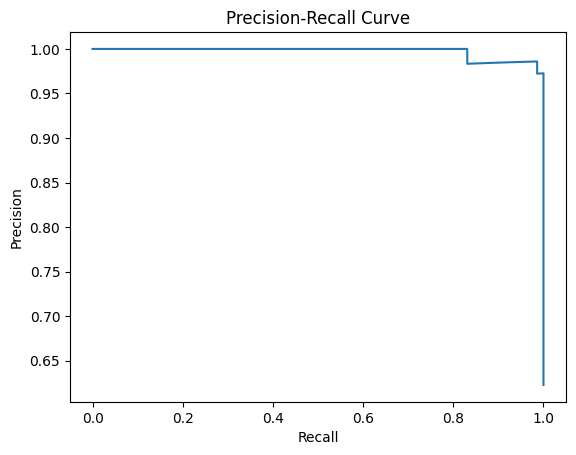

In [26]:
plt.plot(recall_vals, precision_vals)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [27]:
model.save("breast_cancer_model.h5")

In [28]:
# Load the saved model
model = load_model("breast_cancer_model.h5")

In [29]:
# Example new data (replace with actual values)
new_data = np.array([X_test.iloc[0]])  # Using first test sample as example
new_data_scaled = scaler.transform(new_data)

c:\Users\user\Desktop\case_3-predicting_breast_cancer\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Predict
y_pred_prob = model.predict(new_data_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Predicted Tumor Type (0 = Malignant, 1 = Benign):", y_pred[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Tumor Type (0 = Malignant, 1 = Benign): 1
